<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./22_ltpy_v01_AC_SAF_L3_data_products.ipynb"><< 22 - AC SAF Data records (Level 3 products) </a>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space> <a href="./31_ltpy_v01_AC_SAF_L2_case_study.ipynb">31 - AC SAF Level 2 - Case studies >></a>

# Copernicus Sentinel-5 Precursor (Sentinel-5P)

A precursor satellite mission, Sentinel-5P aims to fill in the data gap and provide data continuity between the retirement of the Envisat satellite and NASA's Aura mission and the launch of Sentinel-5. The Copernicus Sentinel-5P mission is being used to closely monitor the changes in air quality and was launched in October 2017.

Sentinel-5p Pre-Ops data are disseminated in the `netCDF` format and can be downloaded via the [Copernicus Open Access Hub](https://scihub.copernicus.eu/).

Sentinel-5p carries the `TROPOMI` instrument, which is a spectrometer in the UV-VIS-NIR-SWIR spectral range. `TROPOMI` provides measurements on:
* `Ozone`
* `NO`<sub>`2`</sub>
* `SO`<sub>`2`</sub>
* `Formaldehyde`
* `Aerosol`
* `Carbonmonoxide`
* `Methane`
* `Clouds`

#### Module outline:
* [1 - Load and browse Sentinel-5P data](#load_s5p)
* [2 - Plotting example - Sentinel-5P data](#plotting_s5p)
* [3 - Retrieve and visualize Sentinel-5P data with a Web Coverage Service from the TOP platform](#wcs_s5p)

#### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings

warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
os.chdir('/Users/julia_wagemann/Documents/github/ltpy/sample_data/level2_case_studies/2019_amazonas_fires/sentinel_5p/')

<hr>

## <a id="load_s5p"></a>Load and browse Sentinel-5P data

### Open one individual Sentinel-5P netCDF file with `NetCDF4`

The dataset object contains information about the general data structure of the dataset. We see that the variables of `Sentinel-5P` data are organised in groups, which is analogous to directories in a filesystem.



In [14]:
s5p_file = nc.Dataset('./20190819/no2/S5P_OFFL_L2__NO2____20190819T164807_20190819T182937_09581_01_010302_20190825T190011.nc', 'r')
s5p_file.groups

OrderedDict([('PRODUCT', <class 'netCDF4._netCDF4.Group'>
              group /PRODUCT:
                  dimensions(sizes): scanline(4173), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
                  variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_

<br>

If we select the `/PRODUCT` group, we get more information on what variables the dataset object contain.

In [15]:
s5p_file.groups['PRODUCT']

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(4173), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time,scanline,ground_pixel), float32 averaging_ker

<br>

We see that the object contains the following variables:
* `delta_time`
* `time_utc`
* `qa_value`
* `nitrogendioxide_tropospheric_column`
* `nitrogendioxide_tropospheric_column_precision`
* `nitrogendioxide_tropospheric_column_precision_kernel`
* `averaging_kernel`
* `air_mass_factor_troposphere`
* `air_mass_factor_total`
* `tm5_tropopause_layer_index`
* `tm5_constant_a`
* `tm5_constant_b`

We can specify one variable of interest and get more detailed information about the variable. E.g. `nitrogendioxide_tropospheric_column` is the tropopshere mole content of nitrogen dioxide, has the unit mol m<sup>-2</sup>, and is a 3D variable.

We can do this for the available variables, but also for the dimensions latitude and longitude.
We see that the `latitude` coordinates range between -85.7 S and 61.7 S and the `longitude` coordinates range between -120.5 W to 101.3 E.

In [16]:
no2 = s5p_file.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column']
lon = s5p_file.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lat = s5p_file.groups['PRODUCT'].variables['latitude'][:][0,:,:]

no2, lon, lat

(<class 'netCDF4._netCDF4.Variable'>
 float32 nitrogendioxide_tropospheric_column(time, scanline, ground_pixel)
     units: mol m-2
     standard_name: troposphere_mole_content_of_nitrogen_dioxide
     long_name: Tropospheric vertical column of nitrogen dioxide
     coordinates: longitude latitude
     ancillary_variables: nitrogendioxide_tropospheric_column_precision air_mass_factor_troposphere air_mass_factor_total averaging_kernel
     multiplication_factor_to_convert_to_molecules_percm2: 6.02214e+19
     _FillValue: 9.96921e+36
 path = /PRODUCT
 unlimited dimensions: 
 current shape = (1, 4173, 450)
 filling on, masked_array(
   data=[[-120.50273 , -119.841225, -119.16614 , ...,   29.758135,
            29.812937,   29.868088],
         [-119.93404 , -119.2655  , -118.58353 , ...,   29.619106,
            29.674427,   29.7301  ],
         [-119.372475, -118.69724 , -118.00872 , ...,   29.480103,
            29.53594 ,   29.592134],
         ...,
         [ 145.85112 ,  145.72299 , 

<br>

We can retrieve the array values of our variable object by selecting the `time` dimension and `.data`. We can have a look at the `minimum` and `maximum` data value to get an idea of the data range. We see that we have negative values. Let's mask the negative values and all values equal to the `_FillValue` and set it to `NaN`. `_FillValue` is used for not significant data. Thus, we want to mask those.

In [17]:
no2_data = no2[0,:,:].data
print(no2_data.min(), no2_data.max())

-0.004332824 9.96921e+36


In [18]:
no2_data[no2_data <= 0.] = no2._FillValue
no2_data[no2_data == no2._FillValue] = np.nan

<br>

## <a id="plotting_s5p"></a>Plotting example - Sentinel-5P data

### Plot `Dataset` NetCDF library object with `matplotlib` and `cartopy`

The retrieved data array from the Dataset NetCDF object is of type `numpy array` and we can plot it with matplotlib's `pcolormesh` function. Due to the nature of the NO<sub>2</sub> data values, we apply a logarithmic scale to the color bar with `LogNorm` from `matplotlib.colors`, which facilitates the visualisation of the data.

We create a function `visualize_s5p_pcolormesh`, where we can specify projection, extent, conversion_factor, color_scale, vmin, vmax and if the plot shall have a global extent.

In [20]:
def visualize_s5p_pcolormesh(data_array, longitude, latitude, projection, color_scale, unit, long_name, lonmin, lonmax, latmin, latmax, set_global=True):
    fig=plt.figure(figsize=(20, 10))

    ax = plt.axes(projection=projection)

    # define the coordinate system that the grid lons and grid lats are on
    img = plt.pcolormesh(longitude, latitude, np.squeeze(data_array), norm=LogNorm(), cmap=plt.get_cmap(color_scale), transform=ccrs.PlateCarree())

    ax.coastlines()
    ax.gridlines()
    if(set_global):
        ax.set_global()
    else:
        ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())

    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
    cbar.set_label(unit, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(long_name, fontsize=20, pad=20.0)

    plt.show()

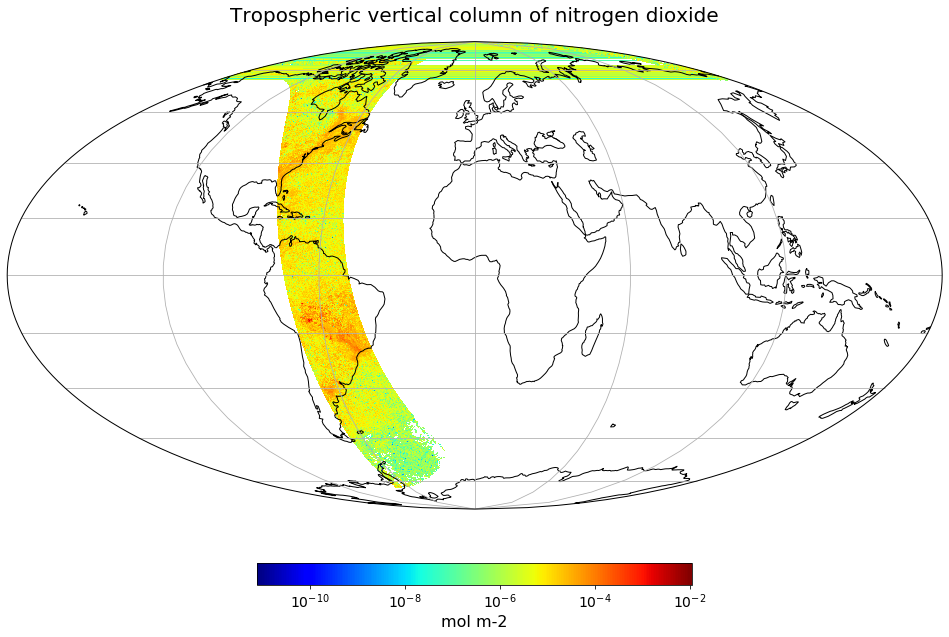

In [21]:
unit = no2.units
long_name = no2.long_name

visualize_s5p_pcolormesh(no2_data, lon, lat, ccrs.Mollweide(), 'jet', unit, long_name, lon.min(), lon.max(), lat.min(), lat.max(), set_global=True)

<br>

We can zoom into a region by specifying a `bounding box` of interest. Let's set the extent to South America, with: `[-100, 0, -80, 40]`. The above plotting function `visualize_s5p_pcolormesh` allows as well to set a specific bounding box. We simply have to set the `set_global` key to False. We adjust the projection to `PlateCarree()`, as this will be more appropriate for a regional subset.

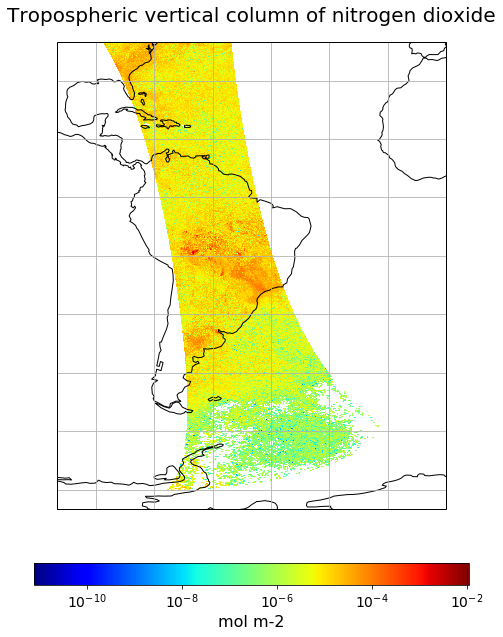

In [22]:
visualize_s5p_pcolormesh(no2_data, lon, lat, ccrs.PlateCarree(), 'jet', unit, long_name, -100, 0, -80, 40, set_global=False)

<br>

### Load multiple Sentinel-5p data files with `xarray` and `open_mfdataset`

The plots above showed the extent of one Sentinel-5P ground track. We can load multiple ground tracks into a single `xarray` and the `DataArrays` will be concatenated at the `scanline` dimension. This allows us to have a larger region of interest (ROI).

In [26]:
s5p_mf_19 = xr.open_mfdataset('./20190819/no2/*.nc', concat_dim='scanline', group='PRODUCT')
s5p_mf_19

<xarray.Dataset>
Dimensions:                                               (corner: 4, ground_pixel: 450, intensity_offset_polynomial_exponents: 1, layer: 34, polynomial_exponents: 6, scanline: 16692, time: 1, vertices: 2)
Coordinates:
  * ground_pixel                                          (ground_pixel) float64 0.0 ... 449.0
  * time                                                  (time) datetime64[ns] 2019-08-19
  * corner                                                (corner) float64 0.0 ... 3.0
  * polynomial_exponents                                  (polynomial_exponents) float64 0.0 ... 5.0
  * intensity_offset_polynomial_exponents                 (intensity_offset_polynomial_exponents) float64 0.0
  * layer                                                 (layer) float64 0.0 ... 33.0
  * vertices                                              (vertices) float64 0.0 1.0
  * scanline                                              (scanline) float64 0.0 ... 4.172e+03
    latitude 

<br>

From our `Dataset` object `s5p_mf_19`, we can choose the data variable of interest, e.g. `nitrogendioxide_tropospheric_column`. It has `3D`. If we want to reduce it by the dimension time, we can simply select the first dimension and reduce it to a `2D` object. We can again use the function `visualize_s5p_pcolormesh` to visualize the data.

In [24]:
no2_19 = s5p_mf_19.nitrogendioxide_tropospheric_column[0,:,:]
lat_19 = no2_19.latitude
lon_19 = no2_19.longitude

unit = no2_19.units
long_name = no2_19.long_name

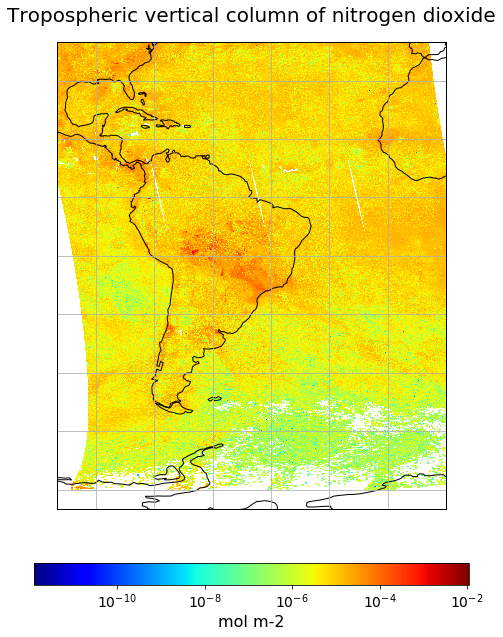

In [25]:
visualize_s5p_pcolormesh(no2_19, lon_19, lat_19, ccrs.PlateCarree(), 'jet', unit, long_name, -100, 0, -80, 40, set_global=False)

<br>

## <a id="wcs_s5p"></a>Retrieve and visualize Sentinel-5P data with a Web Coverage Service from the `TOP platform`

A `Web Coverage Service (WCS)` defined by the `Open Geospatial Consortium (OGC)` allows for a standardised on-demand data access, without the need to download multiple GBs of data. The [Technology and atmospheric mission platform - operations (TOP platform)](https://top-platform.eu) offers a Web Coverage Service protocol to access global Sentinel-5p data.

In [28]:
%load '../../../../atmospheric-composition/adampy.py'

In [29]:
import adampy as adam

<br>

With two lines, we can specify the time range and Sentinel-5P collection we are interested in. With the `getImageSentinel5p` function, we can then retrieve the data without the need to download it. We get the data values as `numpy` array and a dictionary with additional metadata.


In [32]:
collection = 'vr_S5P_OFFLNRTI_L2__NO2'
time_t = '2019-08-18T00:00:00,2019-08-18T23:59:59'

image, metadata = adam.getImageSentinel5p('wcs.top-platform.eu', collection, time_t, scale = 0.1).get_data()
image, metadata

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 {'driver': 'GTiff',
  'dtype': 'float32',
  'nodata': 9.969209968386869e+36,
  'width': 1029,
  'height': 507,
  'count': 1,
  'crs': CRS({'init': 'epsg:4326'}),
  'transform': Affine(0.35000000000000003, 0.0, -179.988503,
         0.0, -0.35000000000000003, 89.889458),
  'bbox': BoundingBox(left=-179.988503, bottom=-87.56054200000001, right=180.16149700000003, top=89.889458)})

<br>

We can make use of the function `visualize_imshow`, which we defined in the module `22_ltpy_v01_AC_SAF_L3_data_products`, but have to adjust it for Sentinel-5P Nitrogen values. Instead of specifying a minimum and maximum of the color range, we add `norm=LogNorm()`, to allow for a logarithmic scaling.

In [43]:
def visualize_imshow(data_array, projection, extent, conversion_factor, color_scale, unit, long_name, set_global=False):
    fig=plt.figure(figsize=(20, 12))

    ax=plt.axes(projection=projection)
    ax.coastlines()
    ax.gridlines()
    if(set_global):
        ax.set_global()

    ax.set_title(long_name, fontsize=20, pad=20.0)

    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top=False
    gl.ylabels_right=False
    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    
    gl.xlabel_style={'size':14}
    gl.ylabel_style={'size':14}

    img1 = plt.imshow(data_array[:],
           extent=extent,
           cmap=color_scale,
           norm=LogNorm(),
           transform=ccrs.PlateCarree())

    cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
    cbar.set_label(unit, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    
    plt.show()

<br>

From the `metadata` object, we can retrieve the `bounding box` information in order to set the extent of the plot.

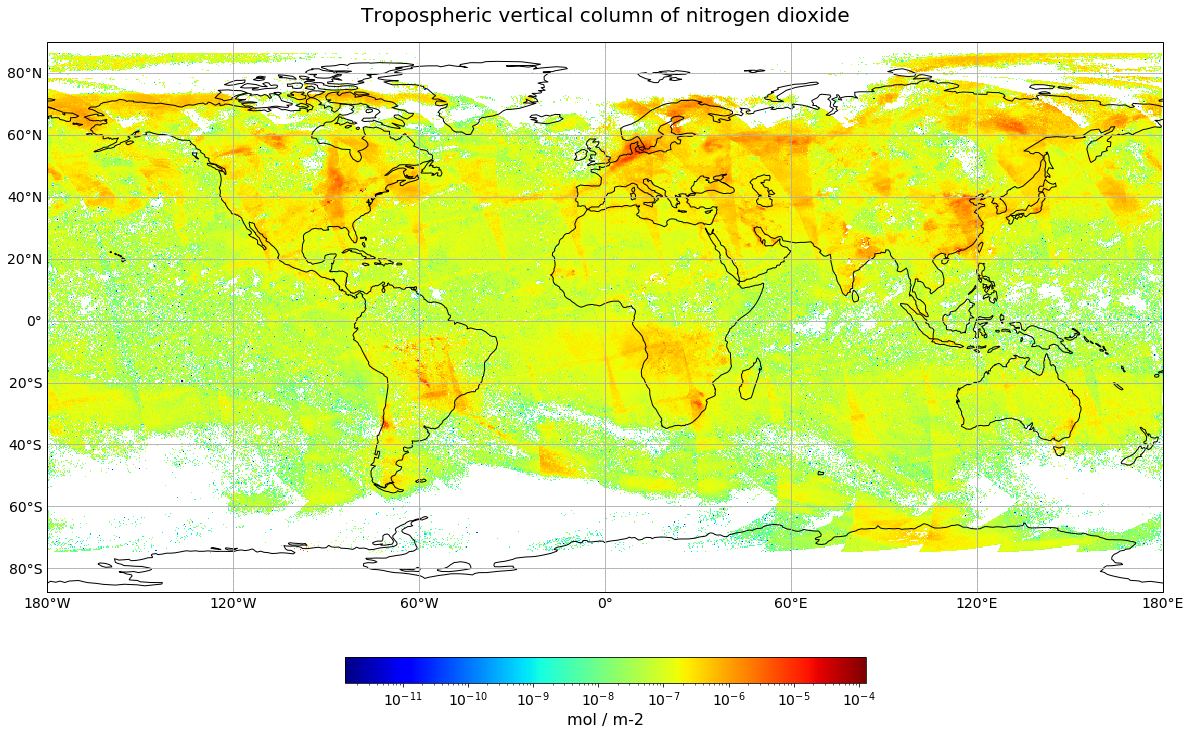

In [46]:
bbox = metadata['bbox']
extent=[bbox[0],bbox[2],bbox[1],bbox[3]]
unit = 'mol / m-2'
long_name = 'Tropospheric vertical column of nitrogen dioxide'

visualize_imshow(image, ccrs.PlateCarree(), extent, 1, 'jet', unit, long_name, set_global=False)

<hr>

<p style="text-align:left;"><a href="https://gitlab.eumetsat.int/eo-lab/training-atmospheric-composition/blob/master/LICENSE">&copy; Copyright 2019 eo-lab</a> <span style="float:right;">View on GitLab | Cite | Contact</span></p>